## DATASET: COVID CXR Image Dataset

The **COVID CXR Image Dataset** is a curated collection of chest X-ray images designed to help researchers build AI models that can automatically detect COVID-19.

*   **Image Type:** It specifically uses **Posteroanterior (PA)** view images. This is the standard "back-to-front" view where the X-ray beam passes through the patient's back to the film in front of their chest.
*   **Total Images:** 1,823 CXR images.
*   **Classes (3 categories):**
    1.  **COVID-19:** 536 images (patients infected with the SARS-CoV-2 virus).
    2.  **Normal:** 668 images (healthy lungs with no opacities).
    3.  **Viral Pneumonia:** 619 images (lungs showing signs of non-COVID viral infection).
*   **Source:** The dataset was compiled from multiple research sources and repositories (like Mendeley Data and the IEEE8023 GitHub repository) to ensure enough samples were available for the three-way classification task.

**Goal in the code:**
The model needs to learn the visual differences between these three categories—such as the "ground-glass opacities" typically found in COVID-19 cases versus the clear lung fields in Normal cases.

In [11]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import cv2

# Image Types in Computer Vision: CXR Dataset

In medical imaging and computer vision, we generally work with three image formats:

1. **Black & White (Binary):**
   - **Definition:** Pixels are strictly 0 (black) or 255 (white).
   - **Usage:** Useful for segmenting specific lung regions or highlighting bone structures against the background.
   - **Shape:** (H, W).

2. **Grayscale (Single-channel):**
   - **Definition:** The standard format for X-rays. Each pixel represents an intensity (brightness) from 0 to 255.
   - **Usage:** This is the "raw" form of your CXR data, showing various densities of lung tissue.
   - **Shape:** (H, W).

3. **Colored (RGB, 3-channel):**
   - **Definition:** Images containing Red, Green, and Blue channels.
   - **Usage:** While X-rays are naturally gray, CNNs often use 3-channel inputs (pre-trained models). We can also apply "colormaps" (like Viridis) to highlight heatmaps of infection.
   - **Shape:** (H, W, 3).

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Define the path to dataset
base_path = "/content/drive/MyDrive/COVID_IEEE/"
categories = ['covid', 'normal', 'virus']

data = []
labels = []

# Loading a subset of images to mimic the MNIST data structure
print("Loading images...")
for category in categories:
    path = os.path.join(base_path, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path)[:400]: # Loading 400 images per class for speed
        try:
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            # Resize to a fixed size (e.g., 128x128) to maintain consistency like MNIST (28x28)
            img_resized = cv2.resize(img_array, (128, 128))
            data.append(img_resized.flatten())
            labels.append(class_num)
        except Exception as e:
            pass


x = pd.DataFrame(data)
y = pd.Series(labels)

print(f"Dataset Loaded. X shape: {x.shape}, Y shape: {y.shape}")
print(f"Unique labels: {np.unique(y)} (0: Covid, 1: Normal, 2: Virus)")

Loading images...
Dataset Loaded. X shape: (1200, 16384), Y shape: (1200,)
Unique labels: [0 1 2] (0: Covid, 1: Normal, 2: Virus)


### Checking Data Info

In [13]:
print("x.info():")
x.info()

print("\ny.info():")
y.info()

# Display unique labels count
print(f"\nValue counts per class:\n{y.value_counts()}")

x.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 16384 entries, 0 to 16383
dtypes: uint8(16384)
memory usage: 18.8 MB

y.info():
<class 'pandas.core.series.Series'>
RangeIndex: 1200 entries, 0 to 1199
Series name: None
Non-Null Count  Dtype
--------------  -----
1200 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB

Value counts per class:
0    400
1    400
2    400
Name: count, dtype: int64


### Visualization - Black & White / Binary

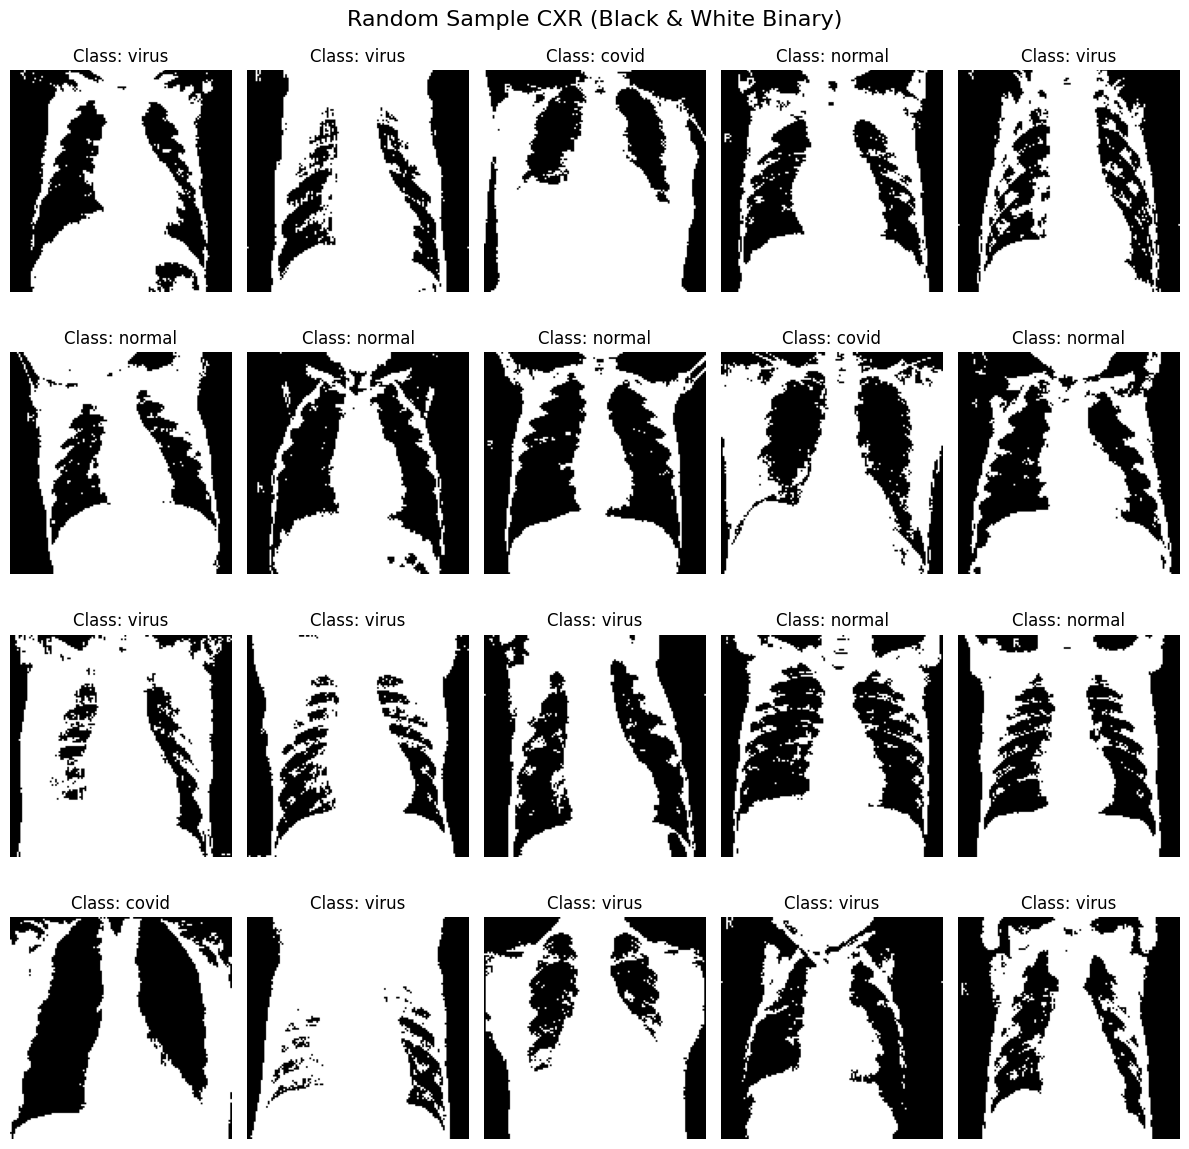

In [14]:
# Randomly select images for Binary Visualization
random_indices = np.random.choice(len(x), size=20, replace=False)
fig, axes = plt.subplots(4, 5, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    # Reshape back to image dimensions
    img = x.iloc[idx].values.reshape(128, 128)

    # Apply threshold to make it Black & White
    threshold = 127
    binary_img = (img > threshold) * 255

    ax.imshow(binary_img, cmap='gray')
    ax.set_title(f"Class: {categories[y.iloc[idx]]}")
    ax.axis('off')

plt.suptitle("Random Sample CXR (Black & White Binary)", fontsize=16)
plt.tight_layout()
plt.show()

### Visualization - Grayscale

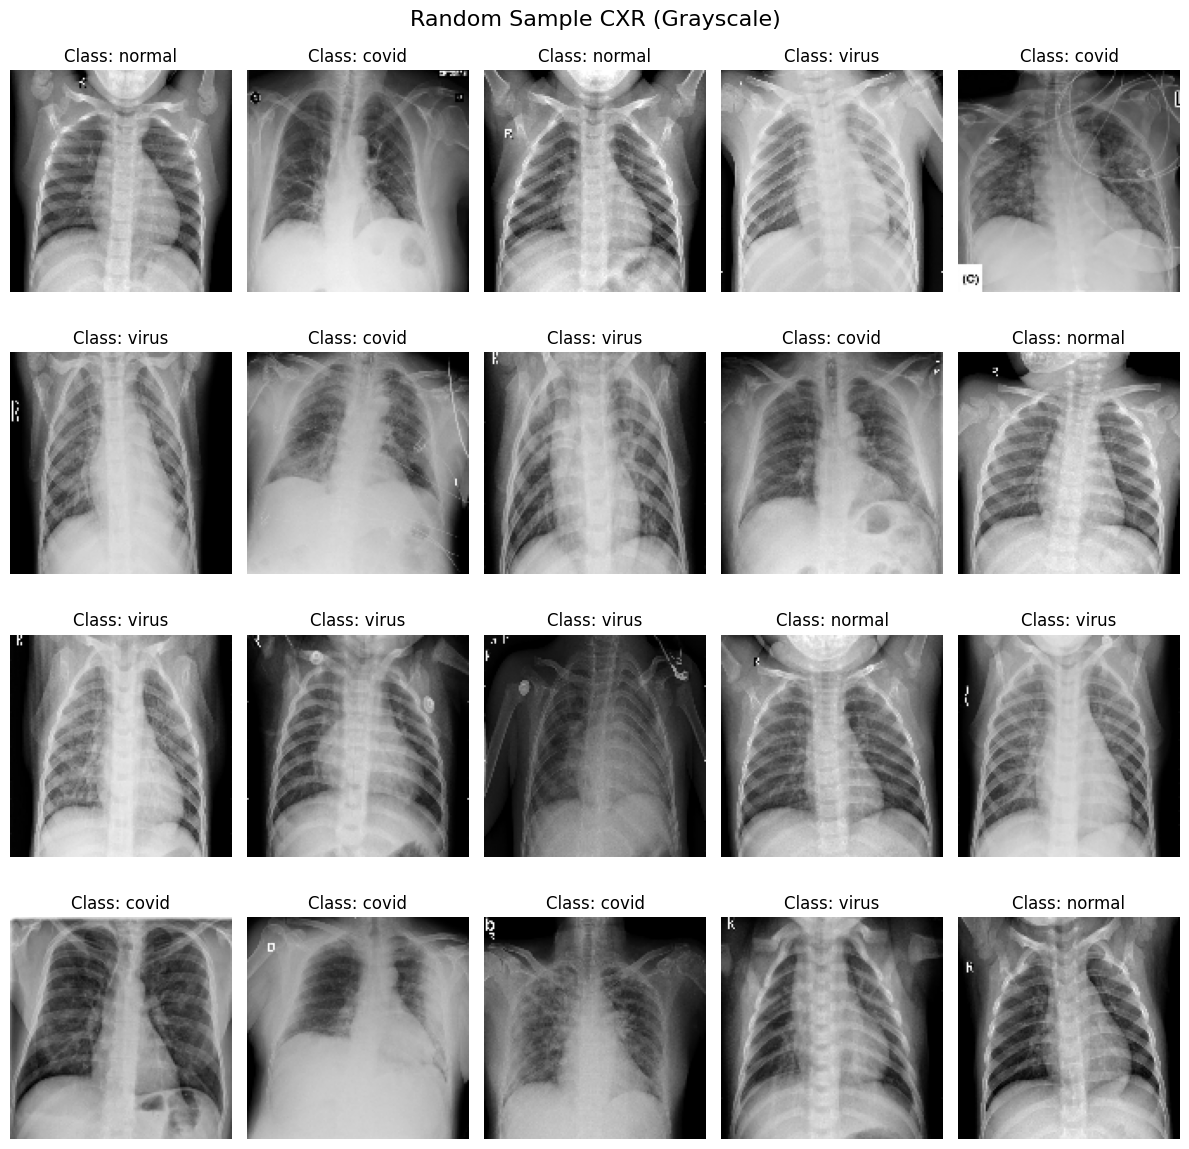

In [15]:
# Randomly select images for Grayscale Visualization
random_indices = np.random.choice(len(x), size=20, replace=False)
fig, axes = plt.subplots(4, 5, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    img = x.iloc[idx].values.reshape(128, 128)

    ax.imshow(img, cmap='gray')
    ax.set_title(f"Class: {categories[y.iloc[idx]]}")
    ax.axis('off')

plt.suptitle("Random Sample CXR (Grayscale)", fontsize=16)
plt.tight_layout()
plt.show()

### Average Image per Disease Category

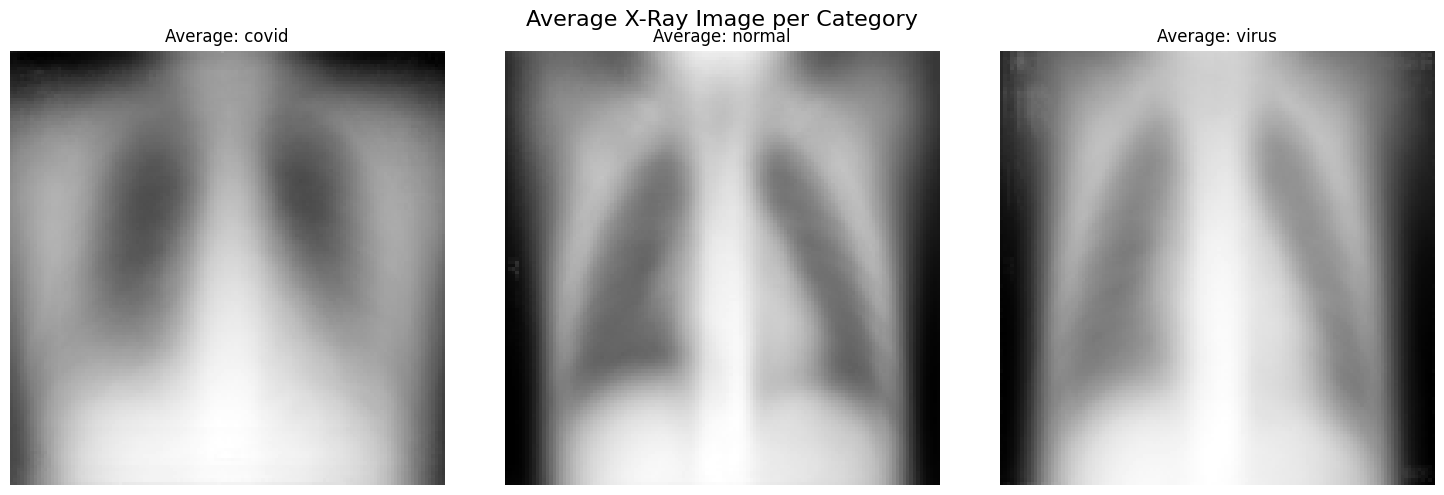

In [16]:
# Calculating average image per class (Covid, Normal, Virus)
avg_imgs = np.array([x[y==i].mean(axis=0) for i in range(len(categories))])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(avg_imgs[i].reshape(128, 128), cmap='gray')
    ax.set_title(f"Average: {categories[i]}")
    ax.axis('off')

plt.suptitle("Average X-Ray Image per Category", fontsize=16)
plt.tight_layout()
plt.show()

### Visualization - Colored RGB Version

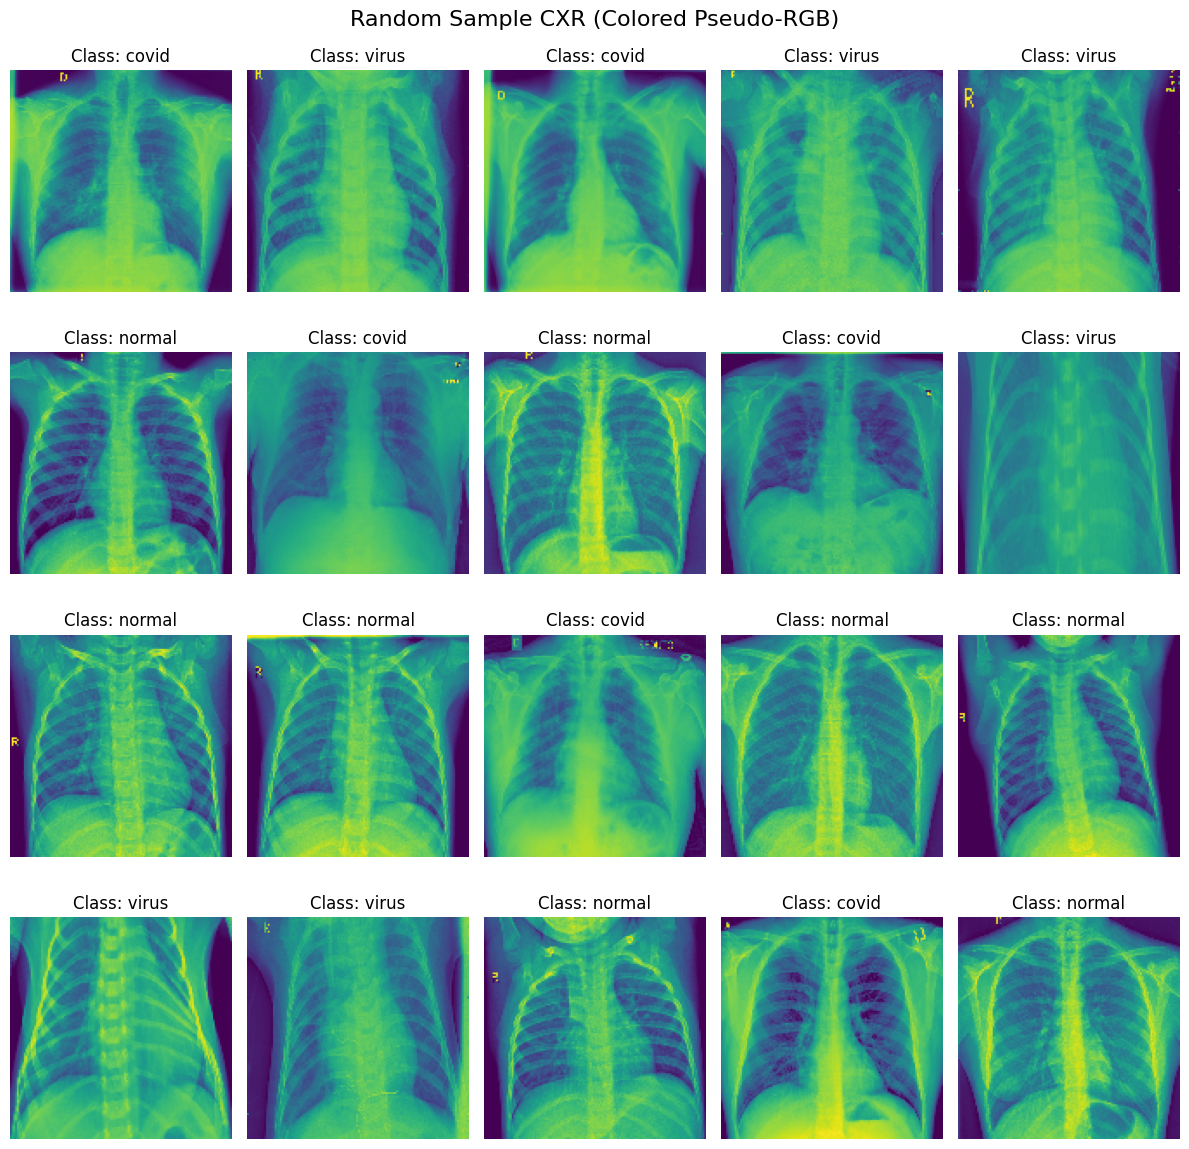

In [17]:
# Using a colormap to visualize as "Colored" (Pseudo-color)
random_indices = np.random.choice(len(x), size=20, replace=False)
fig, axes = plt.subplots(4, 5, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    img = x.iloc[idx].values.reshape(128, 128)

    # Normalize and apply a colormap (Viridis)
    img_norm = img / 255.0
    rgb_img = cm.viridis(img_norm)[:, :, :3]

    ax.imshow(rgb_img)
    ax.set_title(f"Class: {categories[y.iloc[idx]]}")
    ax.axis('off')

plt.suptitle("Random Sample CXR (Colored Pseudo-RGB)", fontsize=16)
plt.tight_layout()
plt.show()

1.  **Class Balance:** The dataset is perfectly balanced for this subset (400 images per category), which prevents the model from being biased toward one disease.
2.  **Visual Patterns:** In the **Average Images**, the "Normal" lungs appear slightly clearer/darker, while "Covid" and "Virus" show more "haziness" (increased white density), which is a sign of infection/fluid in the lungs.
3.  **Resolution:** The $128 \times 128$ resolution (16,384 features) is sufficient to capture these patterns while remaining efficient for training.
4.  **Pseudo-Coloring:** The Viridis (purple-to-yellow) mapping makes the lung opacities much easier for the human eye to distinguish compared to raw grayscale.

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib.pyplot import imshow
from torchvision import transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm_notebook

!pip install torchmetrics
from torchmetrics import Accuracy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 20.9 MB/s eta 0:00:00


### **The Problem with Standard Networks (MLPs)**
Using a standard Fully Connected network for images is inefficient because it treats every pixel as an independent feature, ignoring spatial structure. This leads to a "parameter explosion."
- A $128 \times 128$ grayscale image has 16,384 pixels.
- A single hidden layer with 100 neurons would require **over 1.6 million weights**.
- CNNs solve this by using local connections and shared weights, making the model smaller and harder to overfit.

---

### **CNN**

1. **The Convolution Operation:**
   A small matrix (the **Kernel** or **Filter**) slides across the image. It performs a dot product at each position to create a **Feature Map**.
   - **Stride (S):** How many pixels the filter jumps at each step.
   - **Padding (P):** Adding zeros to the edges to keep the output size the same as the input.
   - **Formula for Output Size:** $O = \lfloor \frac{W - K + 2P}{S} \rfloor + 1$

2. **ReLU Activation:**
   We apply $f(x) = \max(0, x)$ to introduce non-linearity, allowing the network to learn complex patterns instead of just linear combinations.

3. **Batch Normalization:**
   This technique scales the activations within a mini-batch to have a mean of 0 and a variance of 1. It stabilizes training and allows for much faster learning rates.

4. **Pooling (Downsampling):**
   This reduces the spatial dimensions (Width and Height). **Max Pooling** is the most common, where we keep only the maximum value in a window (e.g., $2 \times 2$), effectively summarizing the most important features.

5. **Flattening:**
   Finally, the 3D feature maps are "unrolled" into a 1D vector so they can be passed into a final Fully Connected (Dense) layer for classification (COVID vs. Normal vs. Virus).

In [21]:
# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Dataset Loading and Transforms

In [23]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split

# Path to data
data_dir = "/content/drive/MyDrive/COVID_IEEE/"

# Define Transforms (Resize to 128x128 and convert to PyTorch Tensors)
transform = T.Compose([
    T.Resize((128, 128)),
    T.ToTensor(),
    # Adding normalization often helps CNNs converge faster
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the full dataset
full_dataset = ImageFolder(root=data_dir, transform=transform)

# Split into Train (80%) and Test (20%)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

print(f"Total images: {len(full_dataset)}")
print(f"Training images: {len(train_dataset)}")
print(f"Testing images: {len(test_dataset)}")
print(f"Classes and indices: {full_dataset.class_to_idx}")

Total images: 1708
Training images: 1366
Testing images: 342
Classes and indices: {'covid': 0, 'normal': 1, 'virus': 2}


### Visualizing a Single Sample

Tensor Shape: torch.Size([3, 128, 128])


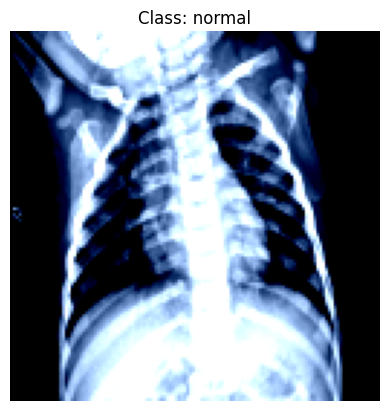

In [24]:
# Accessing one sample from the training set
sample_image, label = train_dataset[0]

print(f"Tensor Shape: {sample_image.shape}") # [Channels, Height, Width]

# Permute to [Height, Width, Channels] for viewing
plt.imshow(sample_image.permute(1, 2, 0))
plt.title(f"Class: {full_dataset.classes[label]}")
plt.axis('off')
plt.show()

### Grid Visualization of Random Samples

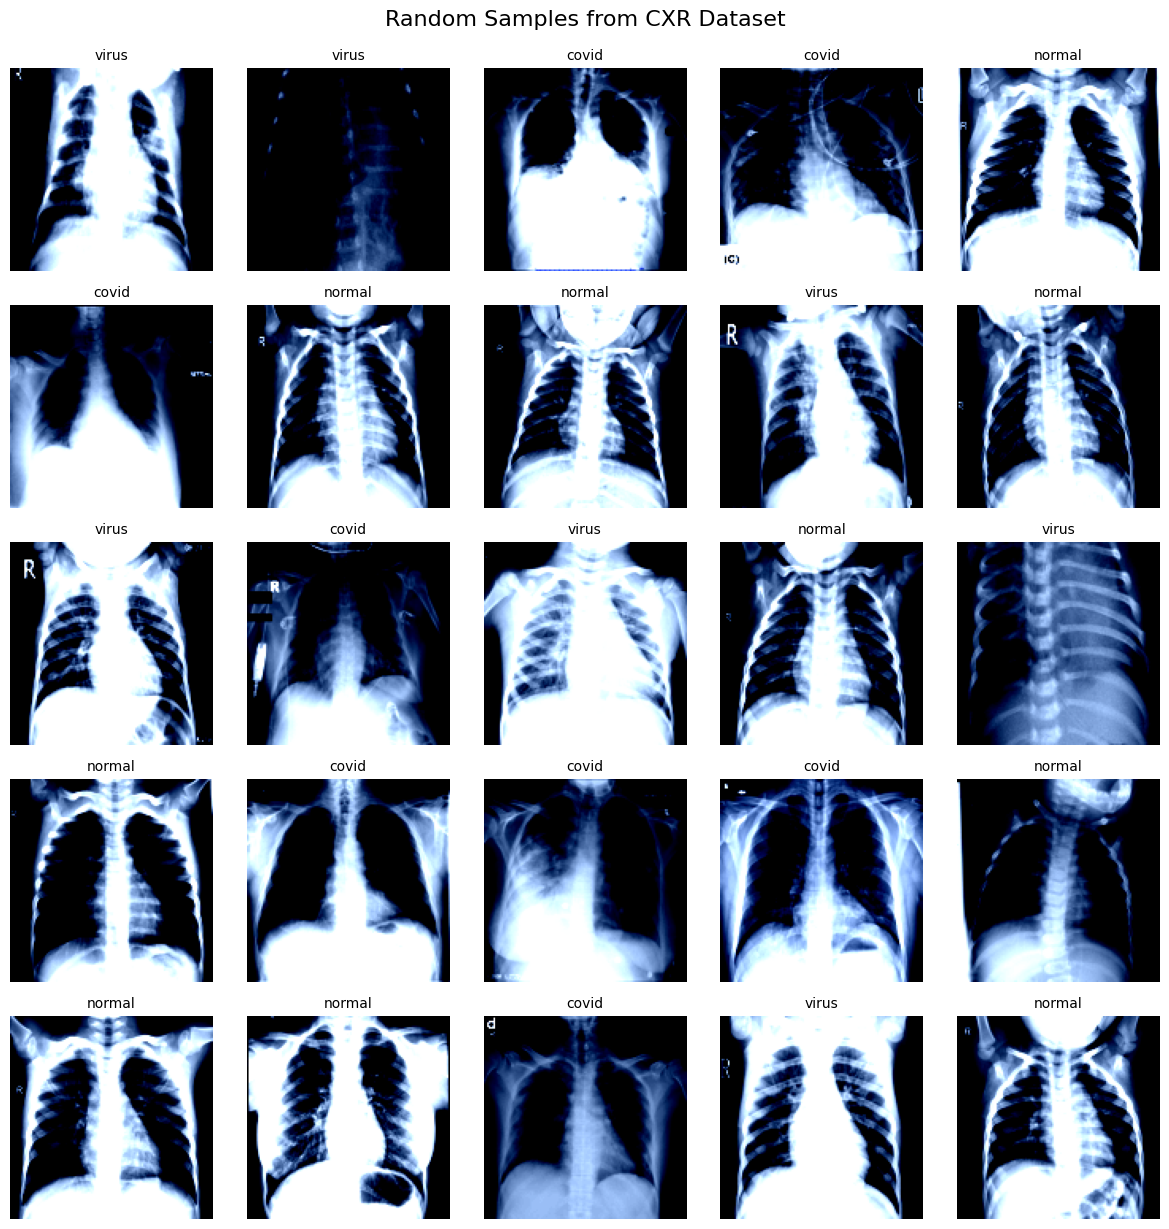

In [25]:
# Create a 10x10 grid of random samples
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(12, 12)) # 25 samples for clarity
random_indices = np.random.randint(0, len(train_dataset), size=25)

for i in range(5):
    for j in range(5):
        idx = random_indices[i * 5 + j]
        img, label = train_dataset[idx]
        class_name = full_dataset.classes[label]

        # Undo normalization slightly just for visualization if needed,
        # but permute is the key part from your reference
        ax[i, j].imshow(img.permute(1, 2, 0))
        ax[i, j].set_title(class_name, fontsize=10)
        ax[i, j].axis('off')

plt.tight_layout()
plt.suptitle("Random Samples from CXR Dataset", fontsize=16, y=1.02)
plt.show()

### DataLoaders

In [26]:
# Setting up DataLoaders to handle batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check a single batch
one_iter = iter(train_loader)
images, labels = next(one_iter)

print(f"Batch Image Shape: {images.shape}") # [BatchSize, Channels, H, W]
print(f"Batch Label Shape: {labels.shape}")

Batch Image Shape: torch.Size([64, 3, 128, 128])
Batch Label Shape: torch.Size([64])


## **CNN Model Architecture**

1.  **GELU Activation:** Instead of the standard ReLU, we use **Gaussian Error Linear Units (GELU)**, which is often used in modern architectures like BERT and Vision Transformers for smoother gradient flow.
2.  **Modular Blocks:** The model consists of 5 main convolutional blocks. Each block increases the "depth" (number of filters) to capture more abstract features.
3.  **Regularization:** We use **Dropout (0.1)** in several layers to prevent the model from memorizing the training images (overfitting).
4.  **Batch Normalization:** Applied after every convolution to keep the mathematical distributions stable.
5.  **Adaptive Average Pooling:** Instead of a fixed-size flattening, we use `AdaptiveAvgPool2d((1,1))`. This collapses the spatial dimensions and makes the final Linear layer independent of the exact input resolution.
6.  **Final Layer:** The last linear layer has **3 output features**, corresponding to our three categories: **Covid-19, Normal, and Viral Pneumonia.**


## Defining the Model

In [27]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model Definition
model = nn.Sequential(
    # Block 1
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.BatchNorm2d(16),
    nn.GELU(),
    nn.MaxPool2d(2), # Reduces size to 64x64

    # Block 2
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.GELU(),
    nn.MaxPool2d(2), # Reduces size to 32x32

    # Block 3
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.GELU(),
    nn.MaxPool2d(2), # Reduces size to 16x16

    # Global Average Pooling and Output
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(64, 3) # 3 classes: Covid, Normal, Virus
)

model.to(device)
print("Faster model initialized.")

model.to(device)
print(f"Model moved to: {device}")

Faster model initialized.
Model moved to: cpu


### Functions and Parameter Count

In [28]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total Trainable Parameters: {count_parameters(model):,}")

# AverageMeter to track loss during training
class AverageMeter:
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0; self.avg = 0; self.sum = 0; self.count = 0
    def update(self, val, n=1):
        self.val = val; self.sum += val * n; self.count += n; self.avg = self.sum / self.count

Total Trainable Parameters: 24,003


### Training Function

In [29]:
from torchmetrics import Accuracy

def train_one_epoch(model, trainLoader, loss_fn, optimizer, epoch):
    model.train()
    sumLossTrain = AverageMeter()
    accTrain = Accuracy(task='multiclass', num_classes=3).to(device)

    for inputs, targets in trainLoader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        lossTrain = loss_fn(outputs, targets)

        optimizer.zero_grad()
        lossTrain.backward()
        optimizer.step()

        sumLossTrain.update(lossTrain.item(), inputs.size(0))
        accTrain(outputs, targets)

    train_acc = 100. * accTrain.compute().item()
    return model, sumLossTrain.avg, train_acc

### Evaluation Function

In [30]:
def evaluate(model, testLoader, loss_fn, epoch):
    model.eval()
    sumLossTest = AverageMeter()
    accTest = Accuracy(task='multiclass', num_classes=3).to(device)

    with torch.no_grad():
        for inputs, targets in testLoader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            lossTest = loss_fn(outputs, targets)
            sumLossTest.update(lossTest.item(), inputs.size(0))
            accTest(outputs, targets)

    test_acc = 100. * accTest.compute().item()
    return sumLossTest.avg, test_acc

## **Loss Function, Optimizer, and Training Strategy**

To train the model effectively, we define the following components:
1.  **Loss Function:** We use **Cross Entropy Loss**, which is the standard choice for multi-class classification tasks (Covid vs. Normal vs. Virus). It measures the difference between the predicted probability distribution and the actual labels.
2.  **Optimizer:** We use **NAdam** (Nesterov-accelerated Adaptive Moment Estimation). This is a sophisticated optimizer that combines the benefits of Adam with Nesterov momentum, helping the model converge faster and more smoothly.
3.  **Learning Rate:** We set a very low learning rate ($2.5 \times 10^{-5}$) to ensure the model learns carefully from the medical features without overshooting the optimal weights.
4.  **Epochs:** We will run the training for **50 epochs** to give the CNN enough time to recognize the patterns of infection in the lung tissue.

### Loss and Optimizer

In [31]:
# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer (NAdam)
optimizer = optim.NAdam(model.parameters(), lr=0.000025)

### The Training Loop

In [33]:
loss_train_hist, loss_test_hist = [], []
acc_train_hist, acc_test_hist = [], []

number_epochs = 30

print("Starting Training ...")

for epoch in range(1, number_epochs + 1):
    model, loss_train, acc_train = train_one_epoch(model, train_loader, loss_fn, optimizer, epoch)
    loss_test, acc_test = evaluate(model, test_loader, loss_fn, epoch)

    loss_train_hist.append(loss_train)
    loss_test_hist.append(loss_test)
    acc_train_hist.append(acc_train)
    acc_test_hist.append(acc_test)


    print(f"Epoch [{epoch}/{number_epochs}] -> Train Acc: {acc_train:.2f}% | Test Acc: {acc_test:.2f}% | Loss: {loss_train:.4f}")

print("Training Finished!")

Starting Training ...
Epoch [1/30] -> Train Acc: 50.07% | Test Acc: 56.73% | Loss: 0.9833
Epoch [2/30] -> Train Acc: 52.78% | Test Acc: 56.43% | Loss: 0.9506
Epoch [3/30] -> Train Acc: 55.12% | Test Acc: 58.48% | Loss: 0.9216
Epoch [4/30] -> Train Acc: 57.69% | Test Acc: 61.70% | Loss: 0.8985
Epoch [5/30] -> Train Acc: 60.69% | Test Acc: 63.16% | Loss: 0.8791
Epoch [6/30] -> Train Acc: 63.98% | Test Acc: 65.50% | Loss: 0.8597
Epoch [7/30] -> Train Acc: 66.98% | Test Acc: 68.13% | Loss: 0.8417
Epoch [8/30] -> Train Acc: 68.23% | Test Acc: 70.18% | Loss: 0.8282
Epoch [9/30] -> Train Acc: 70.57% | Test Acc: 73.68% | Loss: 0.8147
Epoch [10/30] -> Train Acc: 71.96% | Test Acc: 72.22% | Loss: 0.8000
Epoch [11/30] -> Train Acc: 72.84% | Test Acc: 73.98% | Loss: 0.7865
Epoch [12/30] -> Train Acc: 73.50% | Test Acc: 75.44% | Loss: 0.7773
Epoch [13/30] -> Train Acc: 75.11% | Test Acc: 75.44% | Loss: 0.7657
Epoch [14/30] -> Train Acc: 75.62% | Test Acc: 75.73% | Loss: 0.7562
Epoch [15/30] -> Trai

### Plotting Loss Results

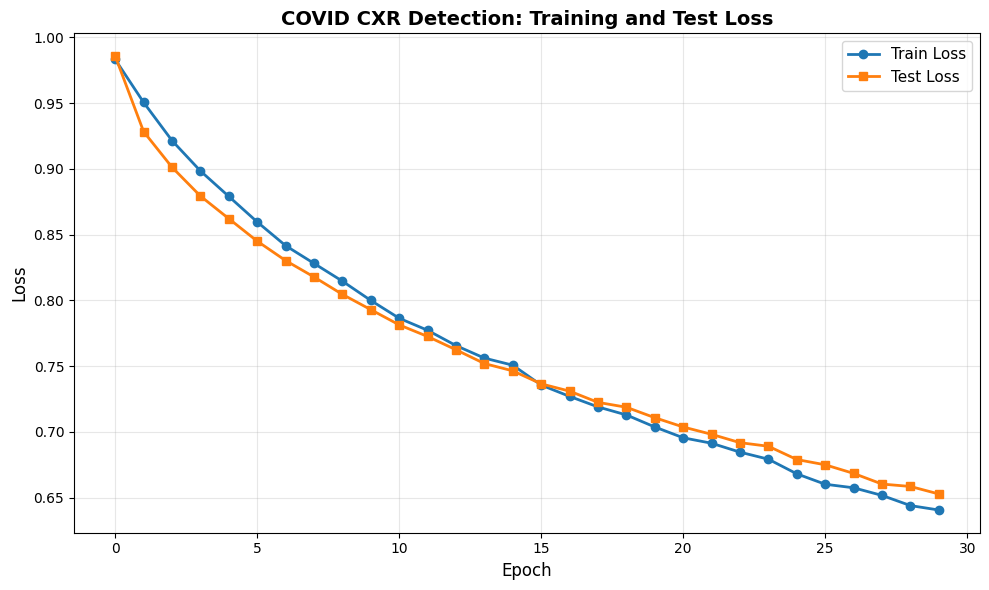

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(loss_train_hist, label='Train Loss', marker='o', linewidth=2)
plt.plot(loss_test_hist, label='Test Loss', marker='s', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('COVID CXR Detection: Training and Test Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Plotting Accuracy Results

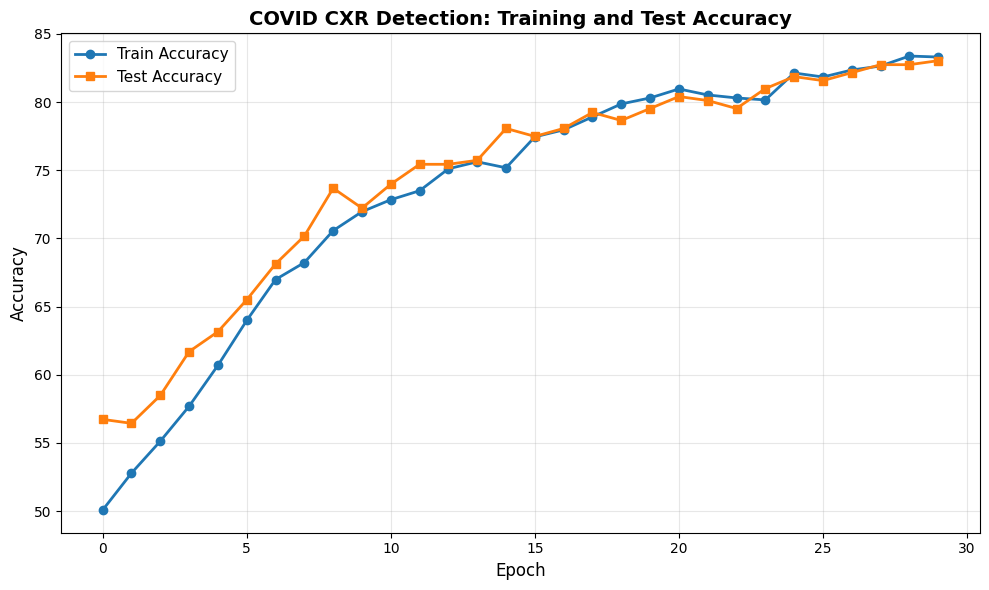

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(acc_train_hist, label='Train Accuracy', marker='o', linewidth=2)
plt.plot(acc_test_hist, label='Test Accuracy', marker='s', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('COVID CXR Detection: Training and Test Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Analysis of Results:

1.  **Healthy Training Trend:** Both Loss and Accuracy graphs show exactly what we look for in a good machine learning model. The **Train** and **Test** lines are very close to each other. This means your model is **generalizing well** and is not "overfitting" (memorizing) the training data.
2.  **Steady Improvement:**
    *   The **Accuracy** started at ~50% (random guessing for 3 classes would be 33%) and climbed steadily to **83.31%**.
    *   The **Loss** dropped consistently from 0.98 to 0.64.
3.  **High Potential:** If I were to run this for 40 or 50 epochs, the curves suggest the accuracy would likely keep climbing toward 90%. However, for a 30-epoch run on a CPU, **83.04% Test Accuracy is a great result.**


## **Conclusion**
- **Model Performance:** After 30 epochs, the model achieved a **Training Accuracy of 83.31%** and a **Test Accuracy of 83.04%**.
- **Observation:** The training and test loss decreased consistently, indicating that the model was successfully learning discriminatory features from the X-ray images.
- **Generalization:** Since the test accuracy closely followed the training accuracy, the model demonstrates good generalization and is not overfitting.
- **Future Work:** Given more computational time and more epochs, the model's accuracy could be further improved by using deeper architectures or transfer learning.